In [2]:
from numbers import Number

import torch
from torch.distributions import Exponential
from torch.distributions import Uniform
from torch.distributions import Normal
from torch.distributions.exp_family import ExponentialFamily
from torch.distributions.utils import broadcast_all
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

def imshow(img):    
    npimg = img.numpy()
    plt.imshow(npimg, cmap = 'gray')
    plt.show()
    
def plot_bar(bins, histogram, axis_x_label, axis_y_label, title):
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    #calculate the width of the histogram bins displayed
    width = np.max(bins) / bins.shape[0]
    print("Width: ", width)
    axes.bar(bins[0:].tolist(), histogram.tolist(), color ='maroon', width = width)
    plt.xlabel(axis_x_label)
    plt.ylabel(axis_y_label)
    plt.title(title)
    plt.show()

In [ ]:
#demo of histogram  and pdf calculation

In [9]:
m_x = torch.tensor([0.0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

hist, bin_edges = torch.histogram(m_x, bins = torch.tensor([0.0, 0.5, 1]))

print("hist \n ", hist)
print("bin_edges \n ", bin_edges)
N = m_x.shape[0]

p_x = hist / N

print("p_x \n ", p_x)

print("Sum of values in p_x ", torch.sum(p_x))


hist 
  tensor([6., 4.])
bin_edges 
  tensor([0.0000, 0.5000, 1.0000])
p_x 
  tensor([0.6000, 0.4000])
Sum of values in p_x  tensor(1.)


## Gaussian Density Function

In [21]:
#create gaussian data sample
n = 1000
normal_dist = torch.distributions.Normal(torch.tensor([8.0]), torch.tensor([2]))
gaussian_sample = normal_dist.sample((n, 1)).squeeze()

#print("gaussian_sample \n ", gaussian_sample)

Width:  1.0


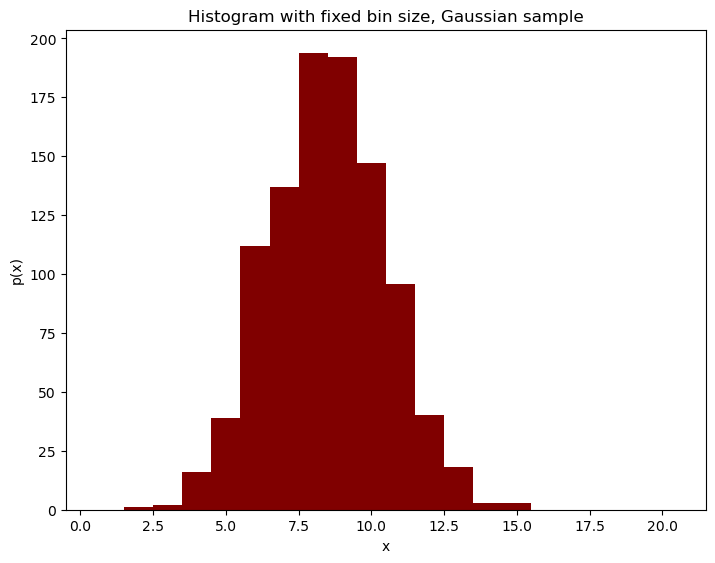

In [22]:
#calculate histogram
#number of bins: number of bins within the range
histogram_gaussian, bins_gaussian = np.histogram(gaussian_sample.numpy(), bins = 20, range = (0, 20))
#normalize the histogram to estimate a density function
p_gaussian = torch.tensor(histogram_gaussian / histogram_gaussian.sum())
  
#plot histogram
plot_bar(bins_gaussian[1:], histogram_gaussian, "x", "p(x)", "Histogram with fixed bin size, Gaussian sample")

In [23]:
def calculate_skew(gaussian_sample):
    e_x = gaussian_sample.mean()
    dif = gaussian_sample - e_x
    var = gaussian_sample.var()
    norm = (dif/var)**3
    gamma_x = (1/n)*torch.sum(norm)
    return gamma_x

gamma_x = calculate_skew(gaussian_sample)
print(gamma_x)

tensor(0.0071)


In [49]:
#evaluate the Gaussian model in different points

def evaluate_gaussian(x_n, mu = 10.0, sigma = 1):
    coef_norm =  1 / (torch.sqrt(torch.tensor(2.0) * torch.pi * sigma ** 2))
    exp_x = torch.exp(torch.tensor(-0.5) * (((x_n - mu) ** 2) / (sigma ** 2)))
    p_gaussian = coef_norm * exp_x
    return p_gaussian
    

x = torch.tensor([1.0, 1.1, 1.2])
p_1 = evaluate_gaussian(x, mu = 10, sigma = 1)


print("p_1 ", p_1)

    
    

p_1  tensor([1.0280e-18, 2.5158e-18, 6.0958e-18])


## Exponential density function

In [15]:
#create exponential sample
n = 100
lambda_dist = 1.3
exponential_dist = torch.distributions.exponential.Exponential(lambda_dist)
exponential_sample = exponential_dist.sample((n,1)).squeeze()
#print("exponential_sample \n", exponential_sample)

Width:  0.6666666666666666


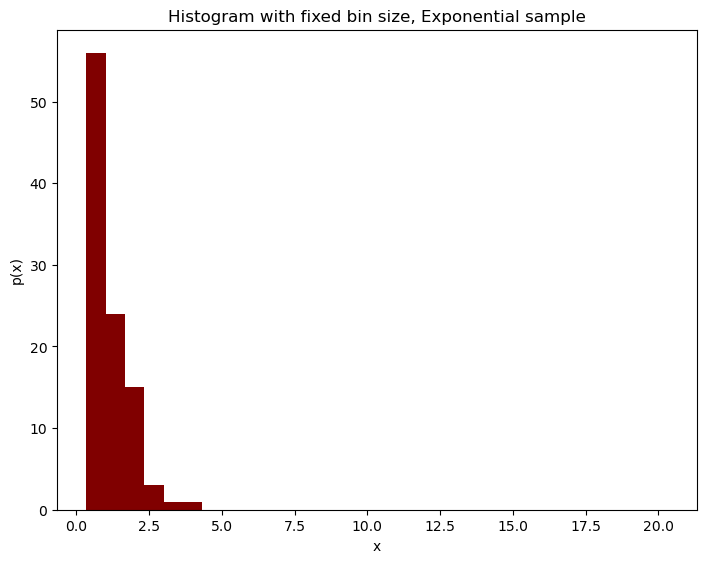

In [16]:

#number of bins: number of bins within the range
histogram_exponential, bins_exponential = np.histogram(exponential_sample.numpy(), bins = 30, range = (0, 20))
#normalize the histogram to estimate a density function
p_exponential = torch.tensor(histogram_exponential / histogram_exponential.sum())
 
plot_bar(bins_exponential[1:], histogram_exponential, "x", "p(x)", "Histogram with fixed bin size, Exponential sample")

In [17]:
lambda_from_data = n / torch.sum(exponential_sample)
print("Lambda:", lambda_from_data.item())

Lambda: 1.3116734027862549


## Weibull density function

Width:  1.6666666666666667


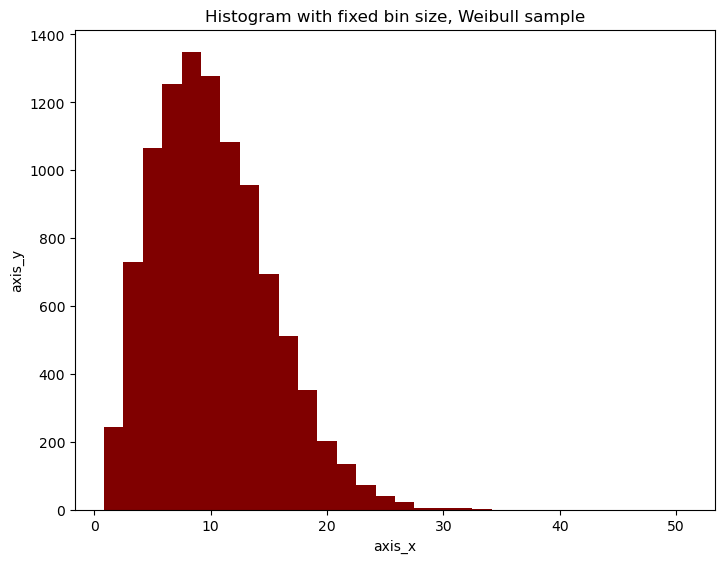

In [61]:

n = 10000
beta_shape = 2
delta_scale = 10.5
weibull_sampler = torch.distributions.weibull.Weibull(torch.tensor([delta_scale]), torch.tensor([beta_shape]))
weibull_sample = weibull_sampler.sample((n,1)).squeeze()

#number of bins: number of bins within the range
histogram_weibull, bins_weibull = np.histogram(weibull_sample.numpy(), bins = 30, range = (0, 50))
#normalize the histogram to estimate a density function
p_weibull = torch.tensor(histogram_weibull / histogram_weibull.sum())
 
plot_bar(bins_weibull[1:], histogram_weibull, "axis_x", "axis_y", "Histogram with fixed bin size, Weibull sample")


## Bernoulli distribution

In [15]:
import torch
import torchvision
# define tensor containing the probabilities to be
# used for drawing the binary random number.
p_corruption_one = 0.6
#p_no_corruption_one = 0.9
probs_corruption_one = p_corruption_one * torch.ones(32, 32)
print("Prob corruption one \n ", probs_corruption_one)


# generate random numbers (0,1) from Bernoulli
# distribution using above probabilities
random_numbers_bernoulli_corruption_one = torch.bernoulli(probs_corruption_one).type(torch.long)


print("random_numbers_bernoulli_corruption_one \n ", random_numbers_bernoulli_corruption_one)


Prob corruption one 
  tensor([[0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
        [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
        [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
        ...,
        [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
        [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
        [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000]])
random_numbers_bernoulli_corruption_one 
  tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 1, 1,  ..., 0, 1, 1],
        [1, 1, 0,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [0, 0, 1,  ..., 0, 1, 0],
        [1, 1, 1,  ..., 1, 1, 1]])


In [20]:

#verify whats the mean of a Bernoulli AV
#E[X] = p
probs_corruption_one_a = p_corruption_one * torch.ones(3200, 320)

random_numbers_bernoulli_corruption_one_a = torch.bernoulli(probs_corruption_one_a).type(torch.float)
mean = random_numbers_bernoulli_corruption_one_a.mean()

print("mean Bernoulli \n ", mean)

#Verify whats the variance of a Bernoulli AV
#....
p = 0.5
sigma_2_theorethical = p*(1 - p)
print("sigma_2_theorethical \n", sigma_2_theorethical)
#print("sigma_2 data ", random_numbers_bernoulli_corruption_one_a.var())



mean Bernoulli 
  tensor(0.5995)
sigma_2_theorethical 
 0.25


Files already downloaded and verified
Original image


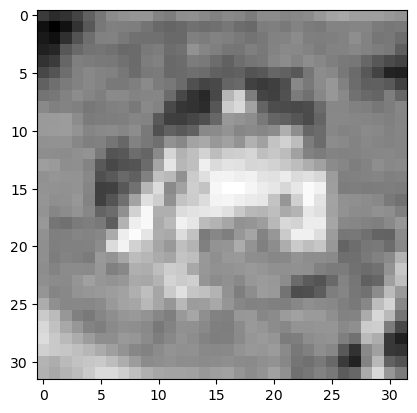

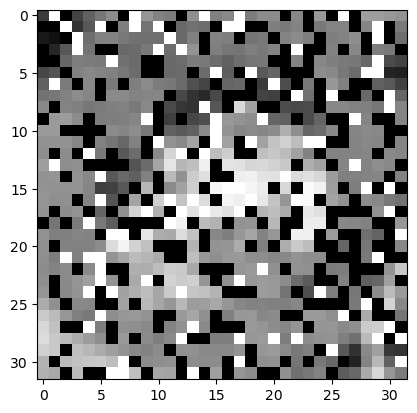

In [8]:

p_corruption_zero = 0.3
#p_no_corruption_zero = 0.9
probs_corruption_zero = p_corruption_zero * torch.ones(32, 32)
# generate random numbers (0,1) from Bernoulli
# distribution using above probabilities
random_numbers_bernoulli_corruption_zero = torch.bernoulli(probs_corruption_zero).type(torch.long)


#if 1, the pixel will be modified with values 0 or 1
#contaminate image from CIFAR-10
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=1)
#load image
dataiter = iter(trainloader)
images, labels = dataiter.next()
image = images[0, 0, :, :]
print("Original image")
imshow(image)
#copy the image
image_corrupted = image.clone().squeeze()
#corrupt the image
image_corrupted[random_numbers_bernoulli_corruption_zero == 1] = 0
image_corrupted[random_numbers_bernoulli_corruption_one == 1] = 1

imshow(image_corrupted)


In [29]:
import numpy as np
n = 7
k = 5
p = 0.82
comb = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
p_k = comb * (p ** k) * (1 - p) ** (n - k)

print("p_k ", p_k)

p_k  0.25225138931328006


## Poisson distribution

Width:  1.0


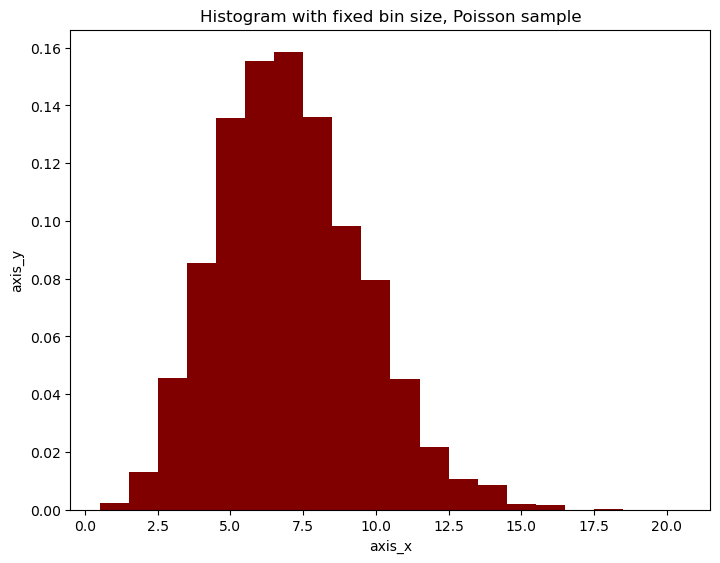

In [25]:
lambda_poisson = 6

rates = torch.ones(3000) * lambda_poisson  # rate parameter between 0 and 5
sample_poisson = torch.poisson(rates)
#number of bins: number of bins within the range
histogram_poisson, bins_poisson = np.histogram(sample_poisson.numpy(), bins = 20, range = (0, 20))
#normalize the histogram to estimate a density function
p_poisson = torch.tensor(histogram_poisson / histogram_poisson.sum())
  

plot_bar(bins_poisson[1:], p_poisson, "axis_x", "axis_y", "Histogram with fixed bin size, Poisson sample")